In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
import os

model_name = os.getenv("MODEL_NAME")
data_path = os.getenv("LOGICAL_REASONING_DATA_PATH")
results_path = os.getenv("LOGICAL_REASONING_RESULTS_PATH")
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, data_path, results_path, max_new_tokens)

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat datasets/mgtv data/open_source_models_few_shots_results.csv 2048


In [6]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [7]:
model_name = "openai"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [8]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  3000 non-null   object
 1   label                 3000 non-null   object
 2   title                 3000 non-null   object
 3   puzzle                3000 non-null   object
 4   truth                 3000 non-null   object
 5   gpt-4o-mini/shots-00  3000 non-null   object
 6   gpt-4o-mini/shots-05  3000 non-null   object
 7   gpt-4o-mini/shots-10  3000 non-null   object
 8   gpt-4o-mini/shots-20  3000 non-null   object
 9   gpt-4o-mini/shots-30  3000 non-null   object
 10  gpt-4o-mini/shots-40  3000 non-null   object
 11  gpt-4o-mini/shots-50  3000 non-null   object
 12  gpt-4o/shots-00       3000 non-null   object
 13  gpt-4o/shots-05       3000 non-null   object
 14  gpt-4o/shots-10       3000 non-null   object
 15  gpt-4o/shots-20       3000 non-null   

In [9]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-20',
 'gpt-4o-mini/shots-30',
 'gpt-4o-mini/shots-40',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-20',
 'gpt-4o/shots-30',
 'gpt-4o/shots-40',
 'gpt-4o/shots-50',
 'o1-mini/shots-10',
 'o1-preview/shots-10',
 'o1-mini/shots-00',
 'o1-preview/shots-00']

In [10]:
result_columns = df.columns.to_list()[5:]
result_columns.sort()
result_columns

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-20',
 'gpt-4o-mini/shots-30',
 'gpt-4o-mini/shots-40',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-20',
 'gpt-4o/shots-30',
 'gpt-4o/shots-40',
 'gpt-4o/shots-50',
 'o1-mini/shots-00',
 'o1-mini/shots-10',
 'o1-preview/shots-00',
 'o1-preview/shots-10']

In [11]:
# sort columns
df2 = df[
    [
        "text",
        "label",
        "title",
        "puzzle",
        "truth",
    ]
].copy()
df2[result_columns] = df[result_columns]

In [12]:
df = df2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  3000 non-null   object
 1   label                 3000 non-null   object
 2   title                 3000 non-null   object
 3   puzzle                3000 non-null   object
 4   truth                 3000 non-null   object
 5   gpt-4o-mini/shots-00  3000 non-null   object
 6   gpt-4o-mini/shots-05  3000 non-null   object
 7   gpt-4o-mini/shots-10  3000 non-null   object
 8   gpt-4o-mini/shots-20  3000 non-null   object
 9   gpt-4o-mini/shots-30  3000 non-null   object
 10  gpt-4o-mini/shots-40  3000 non-null   object
 11  gpt-4o-mini/shots-50  3000 non-null   object
 12  gpt-4o/shots-00       3000 non-null   object
 13  gpt-4o/shots-05       3000 non-null   object
 14  gpt-4o/shots-10       3000 non-null   object
 15  gpt-4o/shots-20       3000 non-null   

In [13]:
df["label"].value_counts()

label
不是      1535
是       1245
不重要      138
问法错误      47
回答正确      35
Name: count, dtype: int64

In [14]:
df_batch = load_openai_batch_data(data_path, model="gpt-4o-mini")

loading existing data from: datasets/mgtv/gpt-4o-mini.jsonl


In [15]:
from llm_toolkit.llm_utils import *

print_row_details(df_batch)

--------------------------------------------------
custom_id: request-1
--------------------------------------------------
method: POST
--------------------------------------------------
url: /v1/chat/completions
--------------------------------------------------
body: {'model': 'gpt-4o-mini', 'messages': [{'role': 'user', 'content': '你是一个情景猜谜游戏的主持人。游戏规则如下：\n\n1. 参与者会得到一个谜面，谜面会描述一个简单又难以理解的事件。\n2. 主持人知道谜底，谜底是谜面的答案。\n3. 参与者可以询问任何封闭式问题来找寻事件的真相。\n4. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。各回答的判断标准如下：\n   - 若谜面和谜底能找到问题的答案，回答：是或者不是\n   - 若谜面和谜底不能直接或者间接推断出问题的答案，回答：不重要\n   - 若参与者提问不是一个封闭式问题或者问题难以理解，回答：问法错误\n   - 若参与者提问基本还原了谜底真相，回答：回答正确\n5. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。\n\n请严格按照这些规则回答参与者提出的问题。\n\n示例输入和输出: \n谜面: 在甄家村里，有一个古老的传说：每年南瓜丰收的季节，南瓜田里总有一个最大的南瓜会不翼而飞，村民们对此现象困惑不解。请找出南瓜失踪背后的原因。\n谜底: 真相原来与一位年迈的农夫有关。这位农夫年轻时，曾与一位美丽的姑娘相恋。他们约定在南瓜丰收的季节结婚。然而，命运弄人，姑娘在婚礼前的一场意外中离世。悲伤的农夫为了纪念心爱的姑娘，每年都会将最大的南瓜偷走，放到姑娘的墓前，以此寄托自己的哀思。这一行为延续了多年，成为了乡村里一个神秘的传说。\n参与者提出的问题: 偷的人信神吗\n回答: 不是\n\n谜面: 在甄家村里，有一个古老

In [16]:
df_batch_results = pd.read_json(
    "data/gpt-4o-mini-10-shots_batch_results.jsonl", orient="records", lines=True
)

df_batch_results["gpt-4o-mini_batch/shots-10"] = df_batch_results["response"].apply(
    lambda x: x["body"]["choices"][0]["message"]["content"]
)
print_row_details(df_batch_results)

--------------------------------------------------
id: batch_req_QhgEHy1hCKwMahJUJNyegrd2
--------------------------------------------------
custom_id: request-1
--------------------------------------------------
response: {'status_code': 200, 'request_id': 'e339850be0c08e2814591677924d440a', 'body': {'id': 'chatcmpl-A6uTom0brJ3zbkh3HqjuAdoxjSL3p', 'object': 'chat.completion', 'created': 1726210440, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '不是', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 2720, 'completion_tokens': 1, 'total_tokens': 2721, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'system_fingerprint': 'fp_483d39d857'}}
--------------------------------------------------
error: nan
--------------------------------------------------
gpt-4o-mini_batch/shots-10: 不是


In [17]:
df["gpt-4o-mini_batch/shots-10"] = df_batch_results["gpt-4o-mini_batch/shots-10"]
print_row_details(df)

--------------------------------------------------
text: 甄加索是自杀吗
--------------------------------------------------
label: 不是
--------------------------------------------------
title: 海岸之谜
--------------------------------------------------
puzzle: 在远离城市喧嚣的海边小屋，一天清晨，邻居发现甄加索僵卧在沙滩上，已无生命迹象。现场没有发现任何打斗的迹象。请问甄加索的死因是什么？
--------------------------------------------------
truth: 甄加索是一位热爱自然的画家，他每年都会来到这个海边小屋寻找灵感。在他生命的最后几天，他一直在创作一幅描绘海洋生物的画作。在画即将完成的前一天晚上，他骑着自行车外出，打算在海边观赏夜景。然而，他在沙滩上意外发现了一只搁浅的海豚，为了救助这只海豚，他耗费了极大的体力，最终成功将其送回海中。筋疲力尽的甄加索在沙滩上睡着了，由于他患有严重的心脏病，却未告知旁人，在寒冷的海风中，他的心脏停止了跳动。因此，警方在现场只发现了车轮痕迹和未完成的画作，而没有发现任何他杀的迹象。
--------------------------------------------------
gpt-4o-mini/shots-00: 不是
--------------------------------------------------
gpt-4o-mini/shots-05: 不是
--------------------------------------------------
gpt-4o-mini/shots-10: 不是
--------------------------------------------------
gpt-4o-mini/shots-20: 不是
--------------------------------------------------
gpt-4o-mini/shots-30: 不是
--------------

In [18]:
perf_df = get_metrics_df(df, variant="shots")
perf_df

columns: ['gpt-4o-mini/shots-00', 'gpt-4o-mini/shots-05', 'gpt-4o-mini/shots-10', 'gpt-4o-mini/shots-20', 'gpt-4o-mini/shots-30', 'gpt-4o-mini/shots-40', 'gpt-4o-mini/shots-50', 'gpt-4o/shots-00', 'gpt-4o/shots-05', 'gpt-4o/shots-10', 'gpt-4o/shots-20', 'gpt-4o/shots-30', 'gpt-4o/shots-40', 'gpt-4o/shots-50', 'o1-mini/shots-00', 'o1-mini/shots-10', 'o1-preview/shots-00', 'o1-preview/shots-10', 'gpt-4o-mini_batch/shots-10']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:458: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots              model                         run  accuracy  precision  \
0      0        gpt-4o-mini        gpt-4o-mini/shots-00  0.717667   0.785707   
1      5        gpt-4o-mini        gpt-4o-mini/shots-05  0.717667   0.776729   
2     10        gpt-4o-mini        gpt-4o-mini/shots-10  0.679333   0.772809   
3     20        gpt-4o-mini        gpt-4o-mini/shots-20  0.662333   0.768671   
4     30        gpt-4o-mini        gpt-4o-mini/shots-30  0.687333   0.768421   
5     40        gpt-4o-mini        gpt-4o-mini/shots-40  0.692333   0.763987   
6     50        gpt-4o-mini        gpt-4o-mini/shots-50  0.717000   0.769264   
7      0             gpt-4o             gpt-4o/shots-00  0.782000   0.820405   
8      5             gpt-4o             gpt-4o/shots-05  0.787333   0.823097   
9     10             gpt-4o             gpt-4o/shots-10  0.791667   0.822771   
10    20             gpt-4o             gpt-4o/shots-20  0.781667   0.820454   
11    30             gpt-4o             gpt-4o/shots-30  0.788667   0.826085   
12    40             gpt-4o             gpt-4o/shots-40  0.784000   0.823351   
13    50             gpt-4o             gpt-4o/shots-50  0.787000   0.823480   
14     0            o1-mini            o1-mini/shots-00  0.708333   0.784810   
15    10            o1-mini            o1-mini/shots-10  0.725000   0.789249   
16     0         o1-preview         o1-preview/shots-00  0.721000   0.784937   
17    10         o1-preview         o1-preview/shots-10  0.749000   0.796448   
18    10  gpt-4o-mini_batch  gpt-4o-mini_batch/shots-10  0.657667   0.768920   

      recall        f1  ratio_valid_classifications  
0   0.717667  0.729606                     0.991667  
1   0.717667  0.718107                     0.999667  
2   0.679333  0.691675                     0.998333  
3   0.662333  0.679802                     0.998000  
4   0.687333  0.691302                     0.999000  
5   0.692333  0.692493                     0.998667  
6   0.717000  0.710523                     0.999333  
7   0.782000  0.795302                     0.066000  
8   0.787333  0.800029                     0.998000  
9   0.791667  0.803615                     0.999667  
10  0.781667  0.796702                     0.999333  
11  0.788667  0.803095                     0.999000  
12  0.784000  0.799334                     0.997333  
13  0.787000  0.801353                     0.999333  
14  0.708333  0.737707                     0.999000  
15  0.725000  0.748562                     0.994333  
16  0.721000  0.745121                     0.998000  
17  0.749000  0.767732                     0.987333  
18  0.657667  0.674832                     0.996000

In [19]:
perf_df.to_csv(metrics_csv, index=False)

0: o1-mini/shots-00
10: o1-mini/shots-10


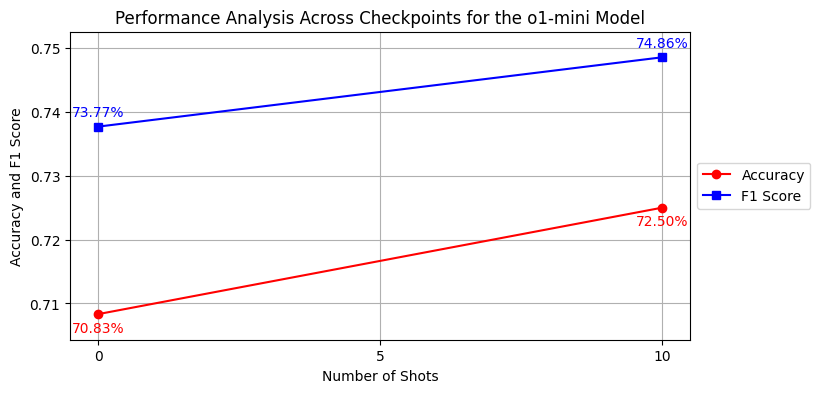

In [20]:
plot_metrics(perf_df, "o1-mini", variant="shots", offset=0.002)

0: o1-preview/shots-00
10: o1-preview/shots-10


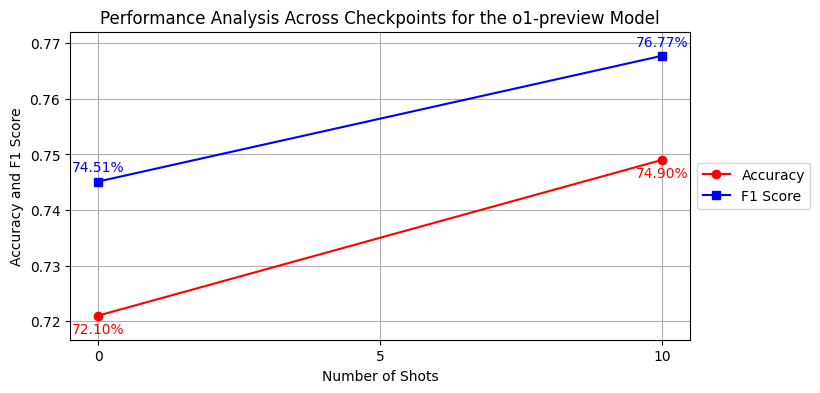

In [21]:
plot_metrics(perf_df, "o1-preview", variant="shots", offset=0.002)

10: gpt-4o-mini_batch/shots-10


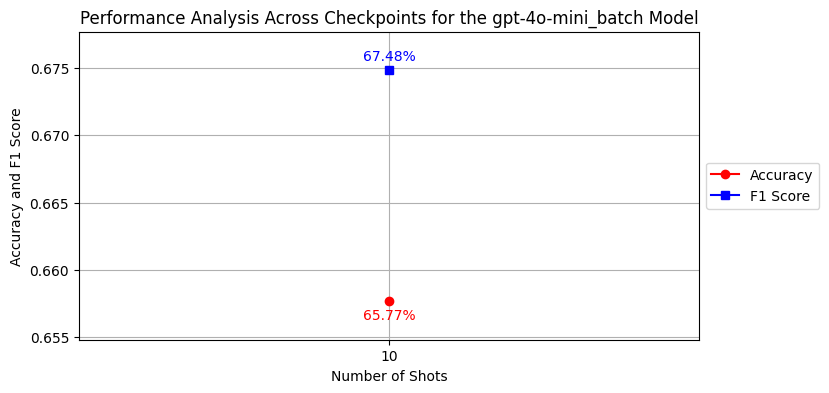

In [22]:
plot_metrics(perf_df, "gpt-4o-mini_batch", variant="shots", offset=0.002)

0: gpt-4o-mini/shots-00
5: gpt-4o-mini/shots-05
10: gpt-4o-mini/shots-10
20: gpt-4o-mini/shots-20
30: gpt-4o-mini/shots-30
40: gpt-4o-mini/shots-40
50: gpt-4o-mini/shots-50


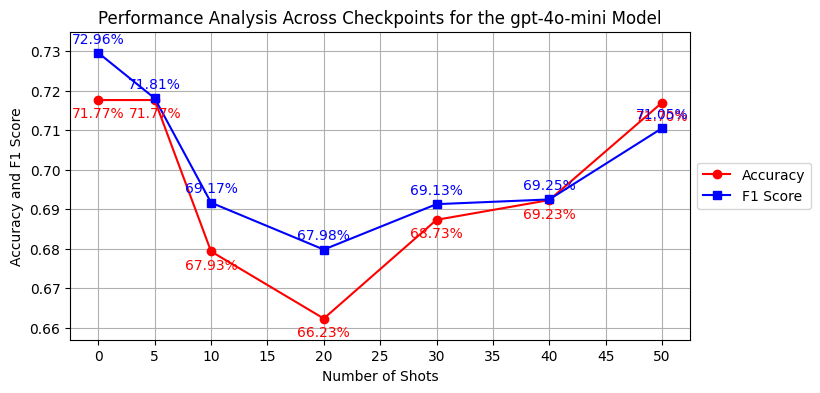

In [23]:
plot_metrics(perf_df, "gpt-4o-mini", variant="shots", offset=0.002)

0: gpt-4o/shots-00
5: gpt-4o/shots-05
10: gpt-4o/shots-10
20: gpt-4o/shots-20
30: gpt-4o/shots-30
40: gpt-4o/shots-40
50: gpt-4o/shots-50


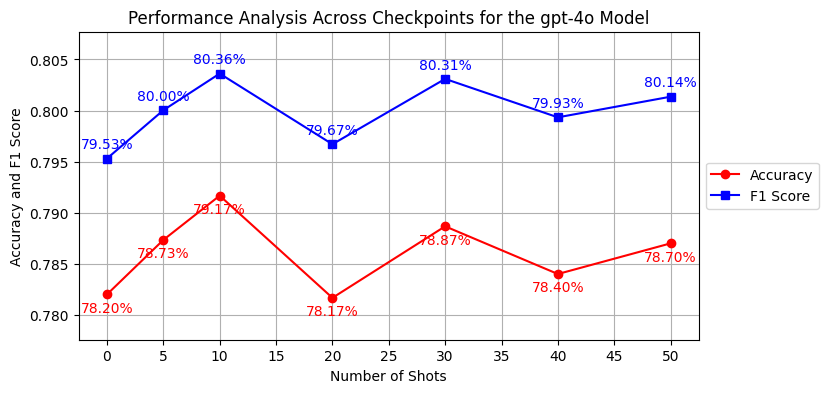

In [24]:
plot_metrics(perf_df, "gpt-4o", variant="shots", offset=0.003)

********** gpt-4o-mini/shots-00 **********
gpt-4o-mini/shots-00
不是       1812
是         788
问法错误      236
不重要       116
回答正确       23
不是。        15
问法错误。       5
回答正确。       3
是。          2
Name: count, dtype: int64


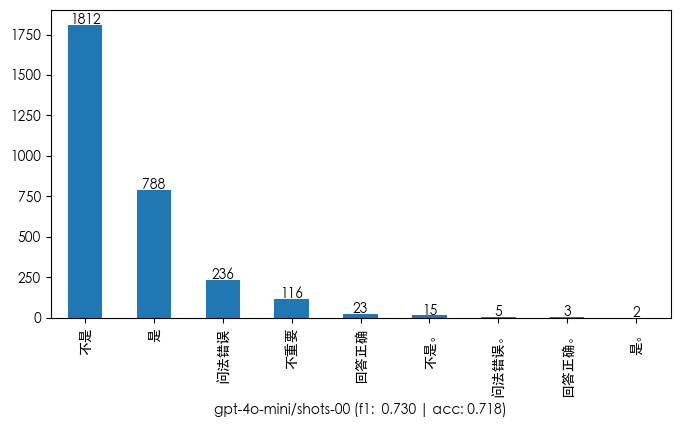

********** gpt-4o-mini/shots-05 **********
gpt-4o-mini/shots-05
不是      1941
是        724
问法错误     148
不重要      136
回答正确      50
回答错误       1
Name: count, dtype: int64


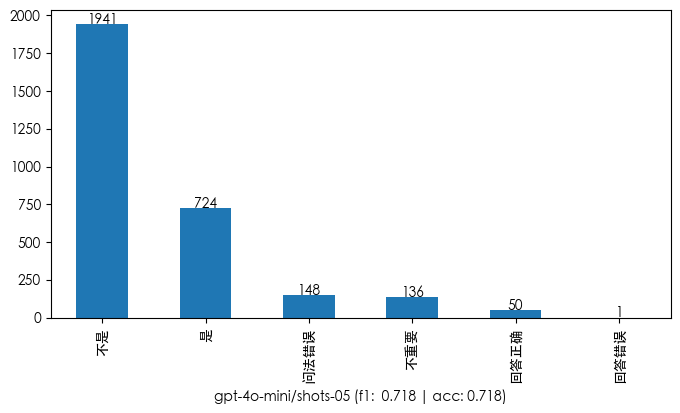

********** gpt-4o-mini/shots-10 **********
gpt-4o-mini/shots-10
不是          1833
是            667
问法错误         230
不重要          205
回答正确          60
回答: 问法错误       2
回答错误           1
回答: 回答正确       1
回答: 不是         1
Name: count, dtype: int64


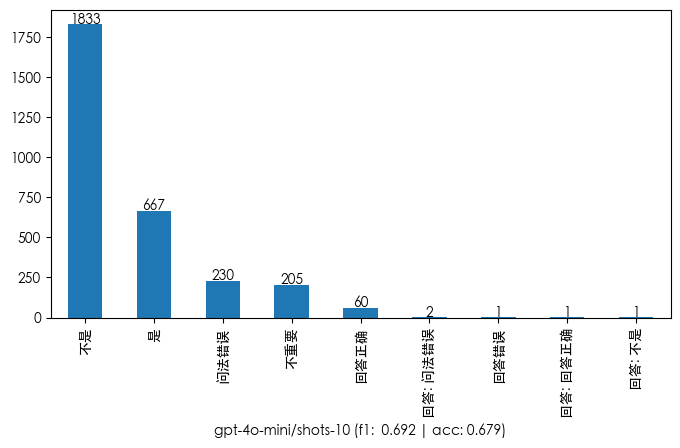

********** gpt-4o-mini/shots-20 **********
gpt-4o-mini/shots-20
不是          1807
是            654
问法错误         296
不重要          171
回答正确          66
回答错误           3
回答: 是          1
回答: 问法错误       1
回答: 回答正确       1
Name: count, dtype: int64


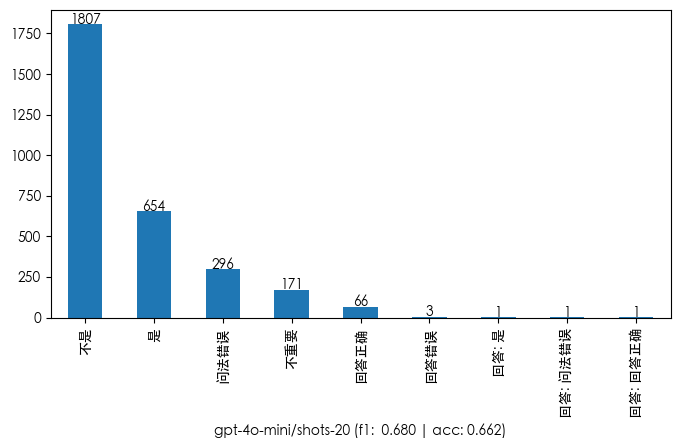

********** gpt-4o-mini/shots-30 **********
gpt-4o-mini/shots-30
不是       1945
是         665
问法错误      225
不重要       100
回答正确       62
回答错误        2
回答: 是       1
Name: count, dtype: int64


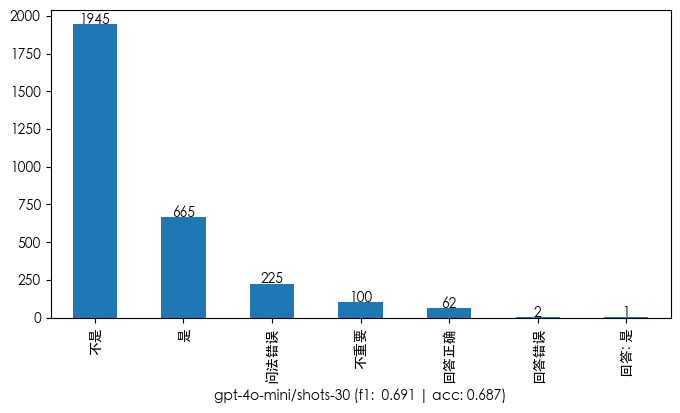

********** gpt-4o-mini/shots-40 **********
gpt-4o-mini/shots-40
不是          1971
是            681
问法错误         200
不重要           80
回答正确          64
回答错误           2
回答: 是          1
回答: 问法错误       1
Name: count, dtype: int64


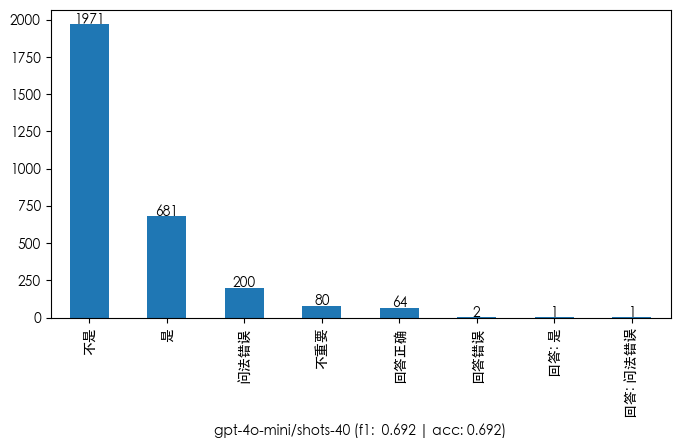

********** gpt-4o-mini/shots-50 **********
gpt-4o-mini/shots-50
不是          2015
是            715
问法错误         137
不重要           74
回答正确          57
回答: 问法错误       1
回答错误           1
Name: count, dtype: int64


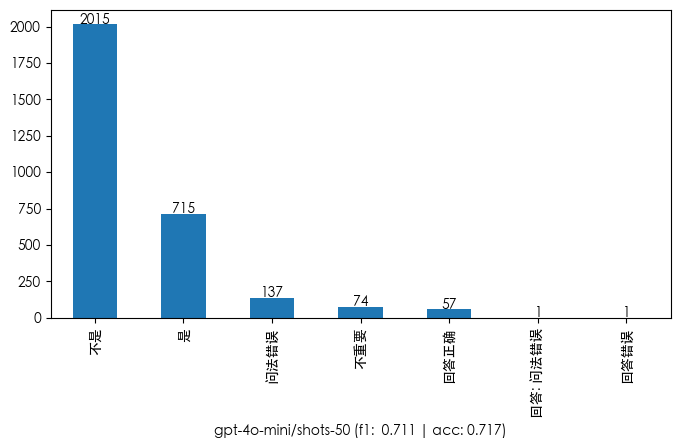

********** gpt-4o/shots-00 **********
gpt-4o/shots-00
不是。           1564
是。            1015
不重要。           142
不重要             82
问法错误            82
回答正确。           41
问法错误。           38
回答正确            14
不是              13
是                7
物品。              1
小男孩的。回答正确。       1
Name: count, dtype: int64


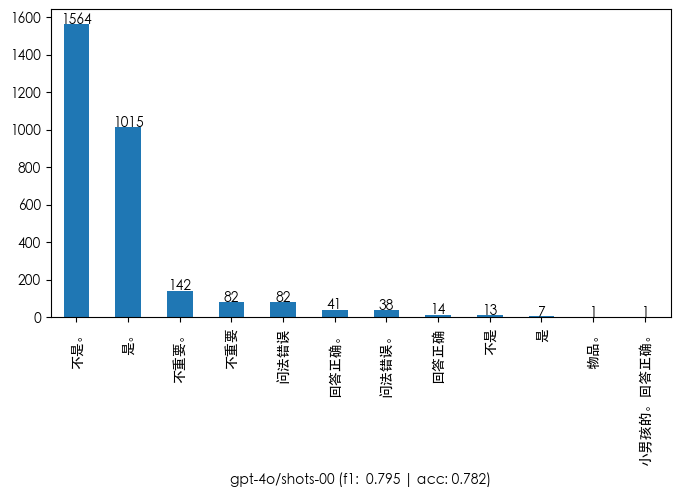

********** gpt-4o/shots-05 **********
gpt-4o/shots-05
不是      1565
是       1034
不重要      256
问法错误      85
回答正确      54
是。         6
Name: count, dtype: int64


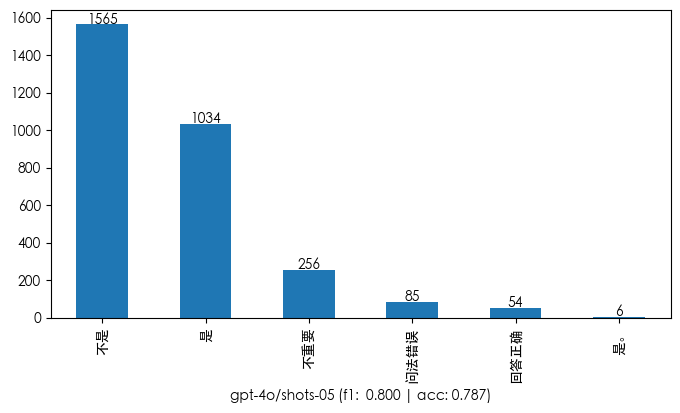

********** gpt-4o/shots-10 **********
gpt-4o/shots-10
不是      1543
是       1082
不重要      240
问法错误      89
回答正确      45
重要         1
Name: count, dtype: int64


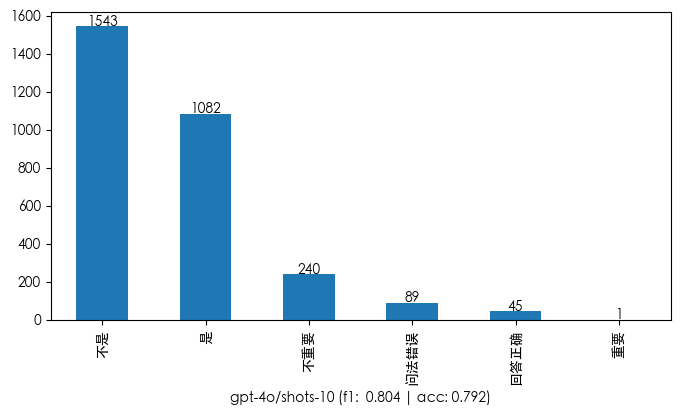

********** gpt-4o/shots-20 **********
gpt-4o/shots-20
不是                                                                                                                                                                                                                                                                                                                                           1507
是                                                                                                                                                                                                                                                                                                                                            1081
不重要                                                                                                                                                                                                                                                                           

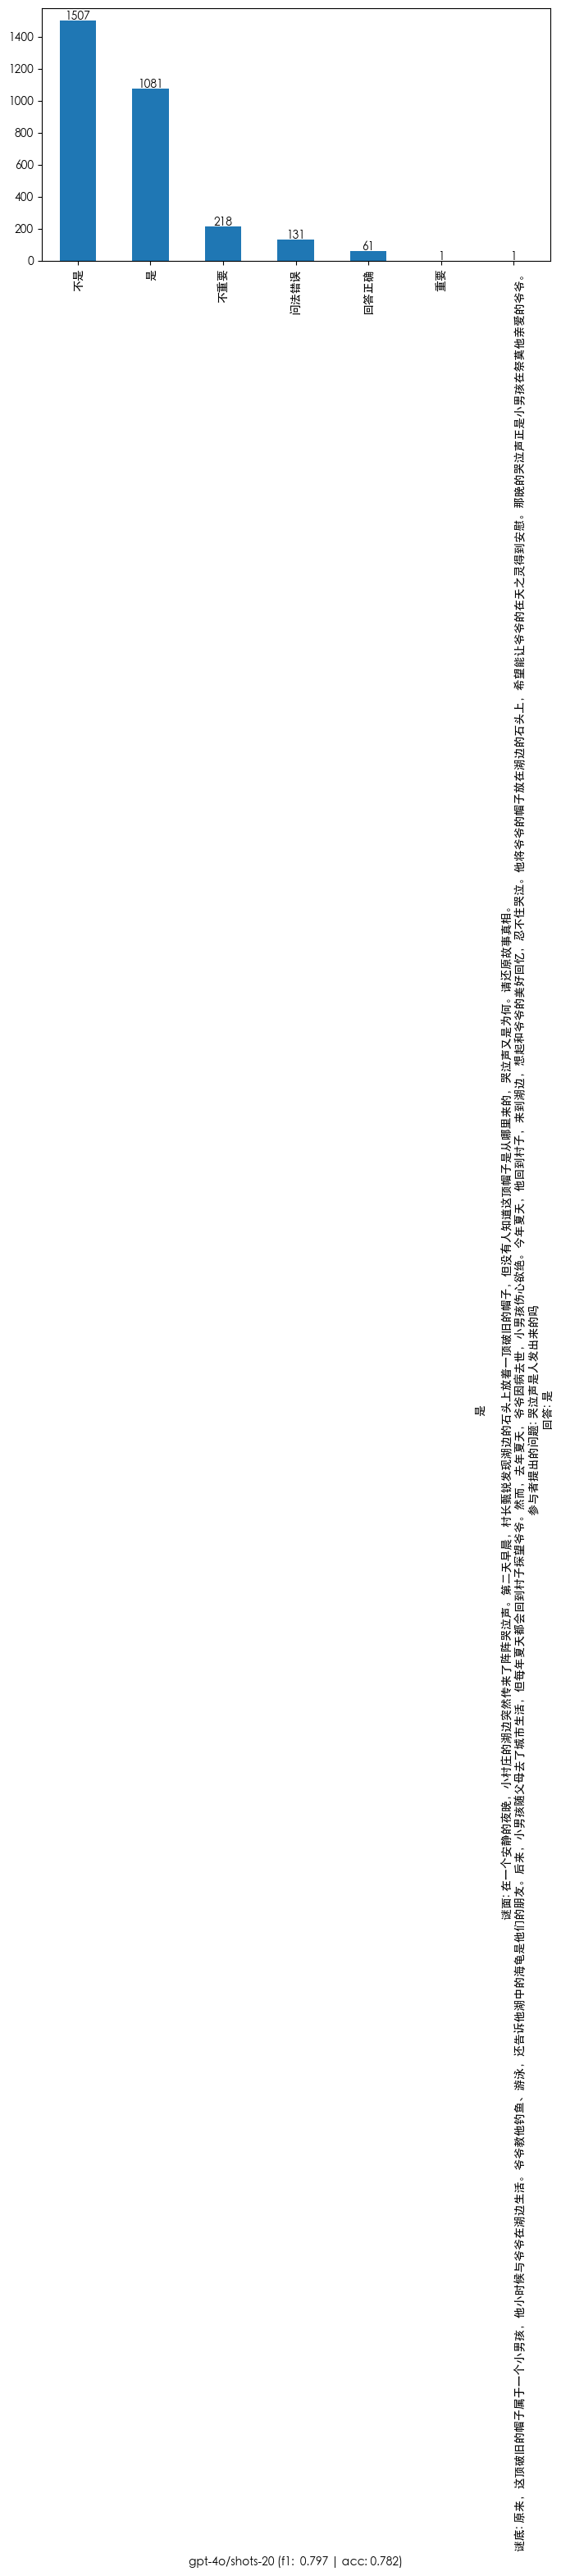

********** gpt-4o/shots-30 **********
gpt-4o/shots-30
不是        1526
是         1073
不重要        204
问法错误       142
回答正确        52
不是\n\n       2
重要           1
Name: count, dtype: int64


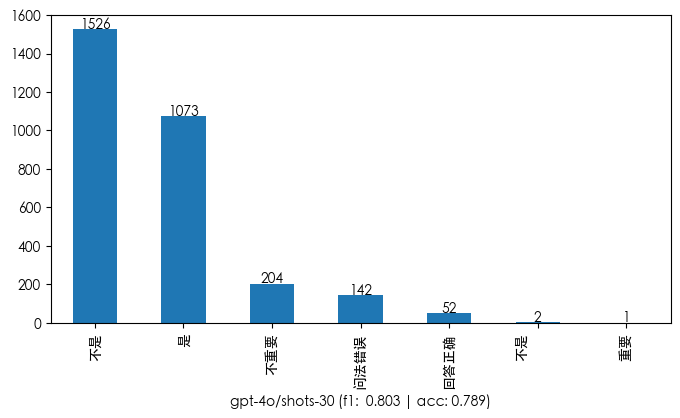

********** gpt-4o/shots-40 **********
gpt-4o/shots-40
不是                                                                                                                                                                                                                                                                                                                                                         1513
是                                                                                                                                                                                                                                                                                                                                                          1072
不重要                                                                                                                                                                                                                                               

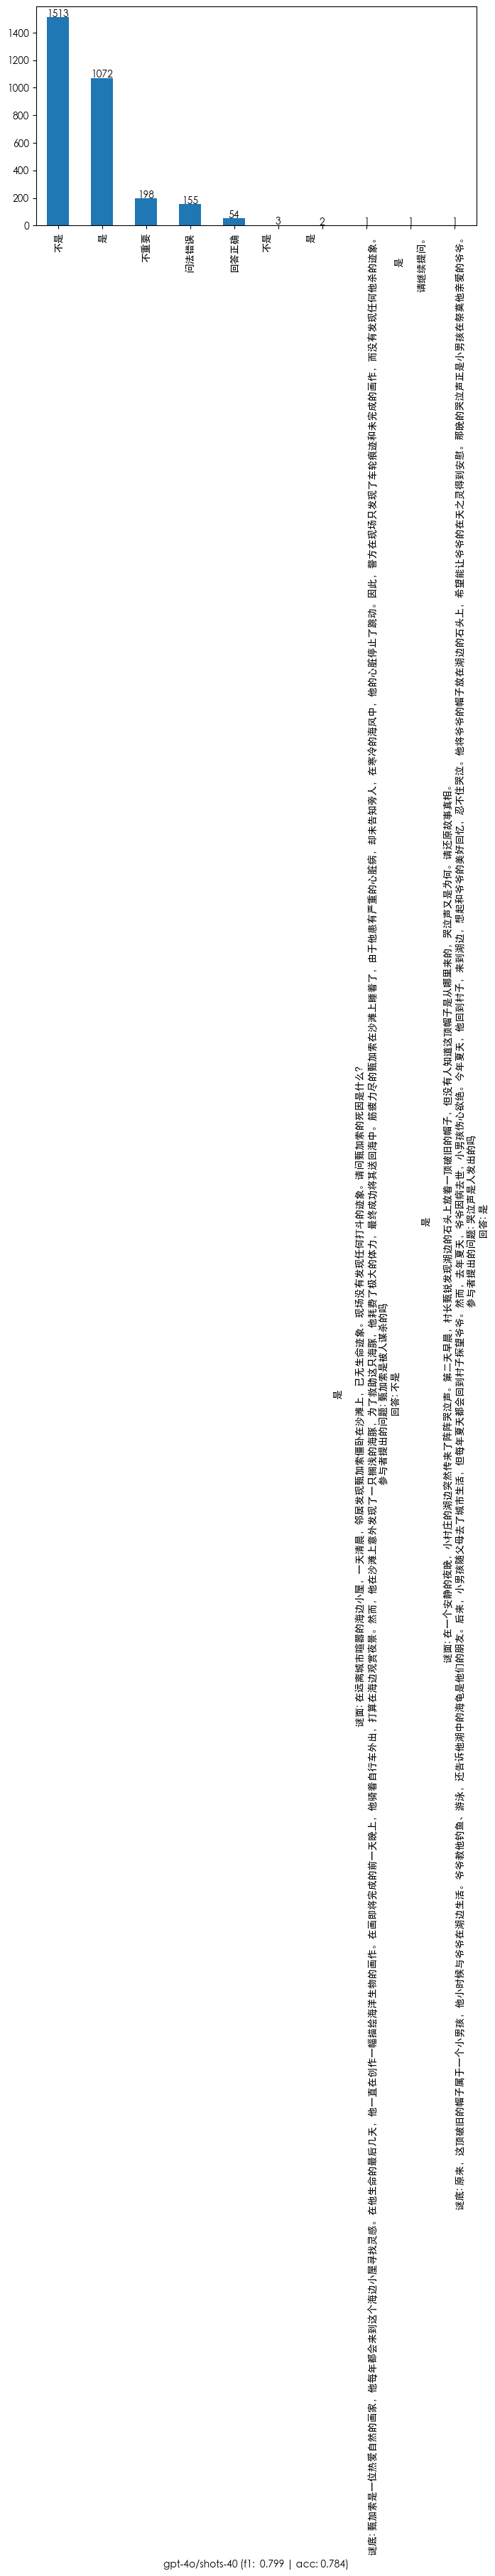

********** gpt-4o/shots-50 **********
gpt-4o/shots-50
不是       1523
是        1081
不重要       217
问法错误      126
回答正确       51
是\n\n       1
重要          1
Name: count, dtype: int64


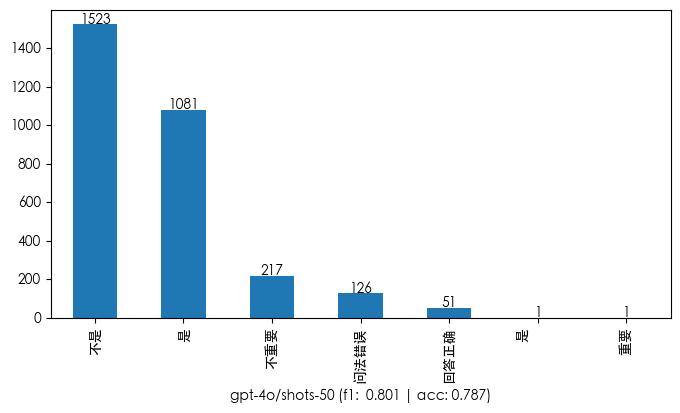

********** o1-mini/shots-00 **********
o1-mini/shots-00
不是       1476
是         970
不重要       238
问法错误      208
回答正确      105
是。          1
回答: 是       1
不是。         1
Name: count, dtype: int64


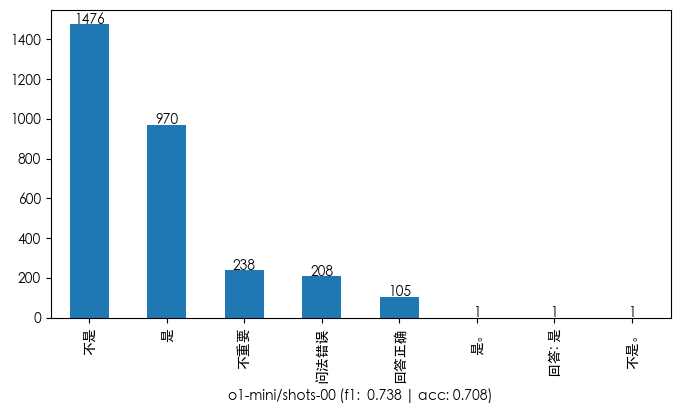

********** o1-mini/shots-10 **********
o1-mini/shots-10
不是          1478
是            993
不重要          263
问法错误         137
回答正确         112
回答: 是          7
回答: 问法错误       6
回答: 不是         2
回答: 回答正确       1
回答: 不重要        1
Name: count, dtype: int64


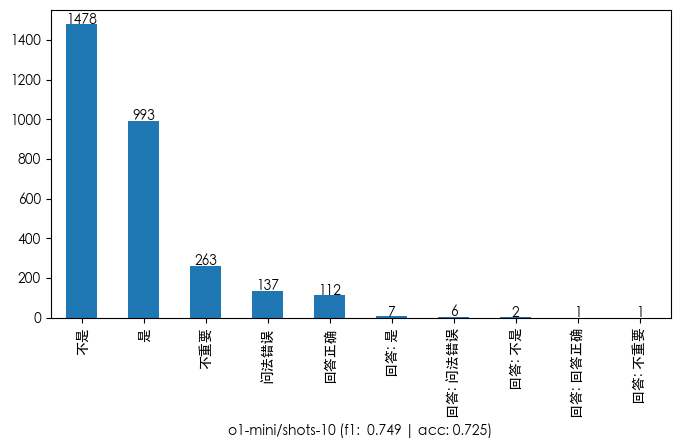

********** o1-preview/shots-00 **********
o1-preview/shots-00
不是       1519
是         999
问法错误      322
不重要        97
回答正确       57
回答: 是       6
Name: count, dtype: int64


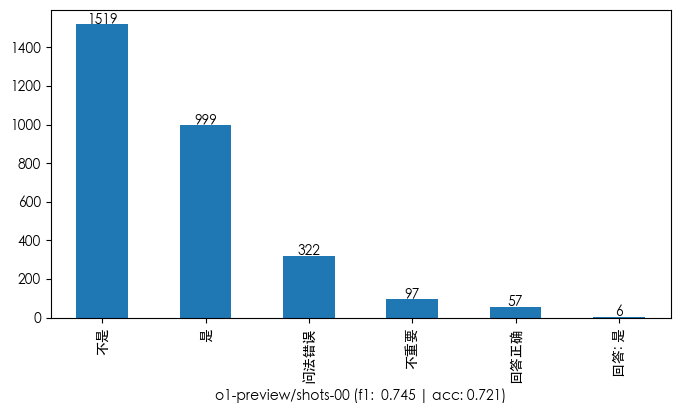

********** o1-preview/shots-10 **********
o1-preview/shots-10
不是          1478
是           1061
问法错误         232
不重要          122
回答正确          69
回答: 是         25
回答: 不是         8
回答: 问法错误       5
Name: count, dtype: int64


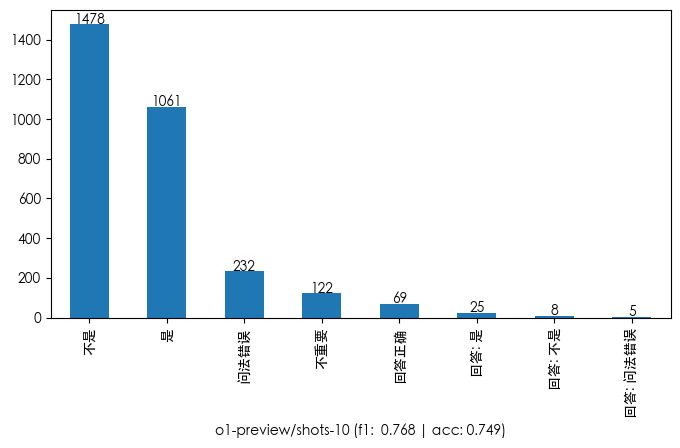

********** gpt-4o-mini_batch/shots-10 **********
gpt-4o-mini_batch/shots-10
不是          1823
是            632
问法错误         301
不重要          176
回答正确          56
回答错误           4
回答: 不是         2
回答: 是          2
回答: 问法错误       2
是不重要           1
回答: 不重要        1
Name: count, dtype: int64


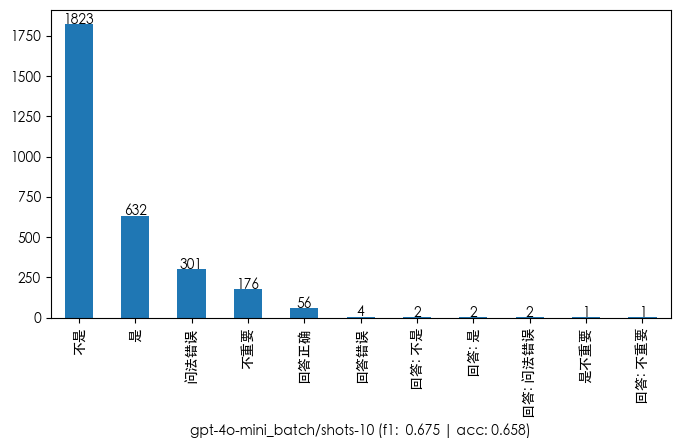

In [25]:
for col, f1, accuracy in zip(df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})")

********** gpt-4o-mini/shots-00 **********
gpt-4o-mini/shots-00
不是       1812
是         788
问法错误      236
不重要       116
回答正确       23
不是。        15
问法错误。       5
回答正确。       3
是。          2
Name: count, dtype: int64


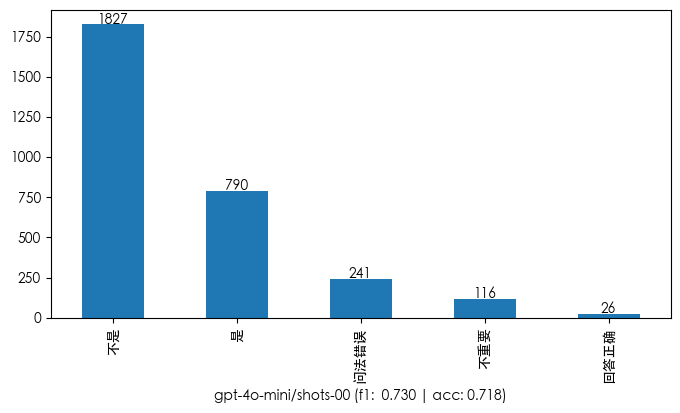

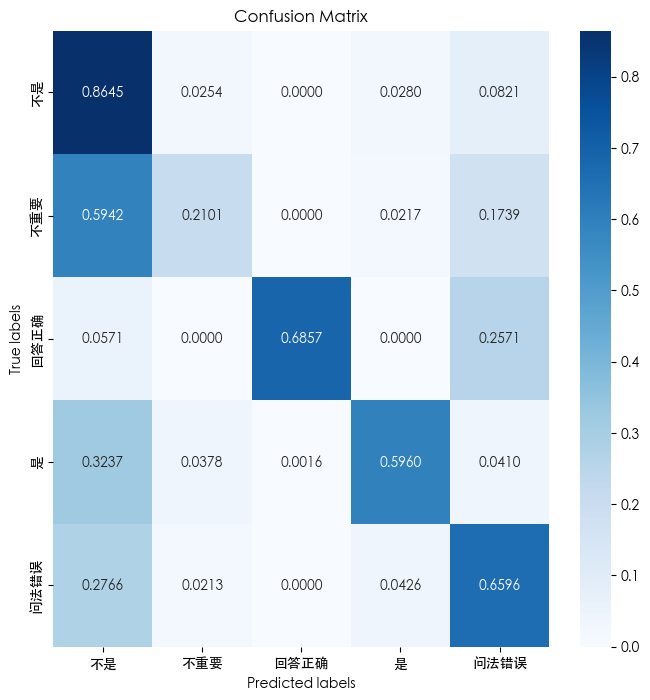

********** gpt-4o-mini/shots-05 **********
gpt-4o-mini/shots-05
不是      1941
是        724
问法错误     148
不重要      136
回答正确      50
回答错误       1
Name: count, dtype: int64


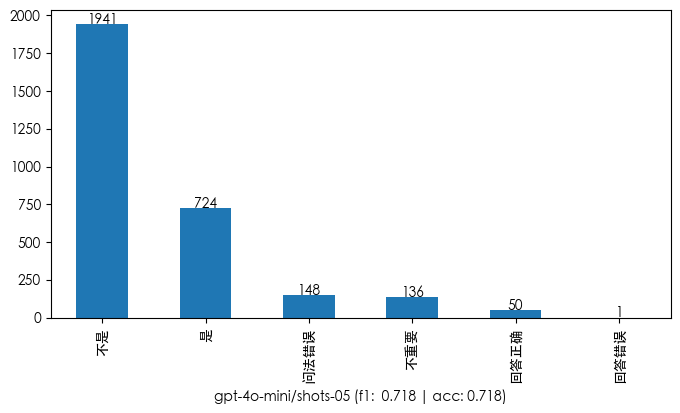

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


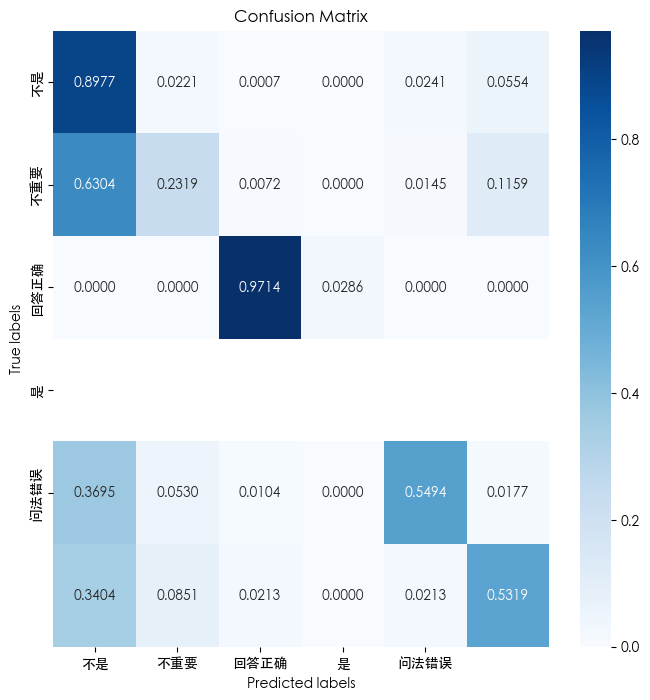

********** gpt-4o-mini/shots-10 **********
gpt-4o-mini/shots-10
不是          1833
是            667
问法错误         230
不重要          205
回答正确          60
回答: 问法错误       2
回答错误           1
回答: 回答正确       1
回答: 不是         1
Name: count, dtype: int64


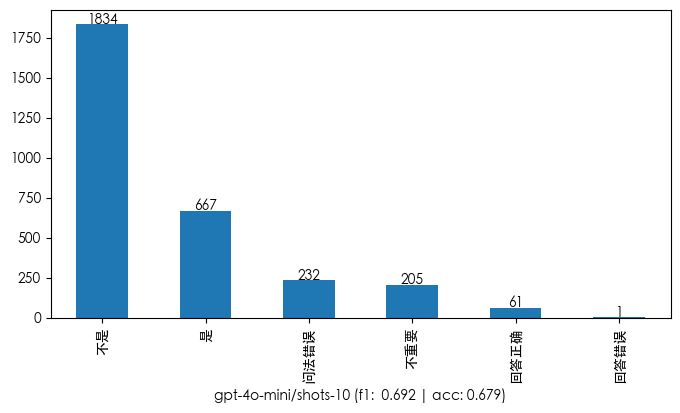

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


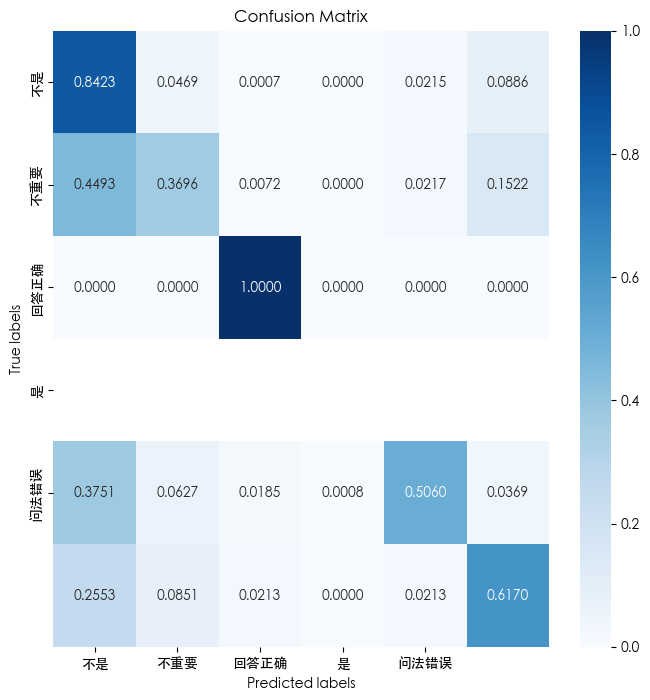

********** gpt-4o-mini/shots-20 **********
gpt-4o-mini/shots-20
不是          1807
是            654
问法错误         296
不重要          171
回答正确          66
回答错误           3
回答: 是          1
回答: 问法错误       1
回答: 回答正确       1
Name: count, dtype: int64


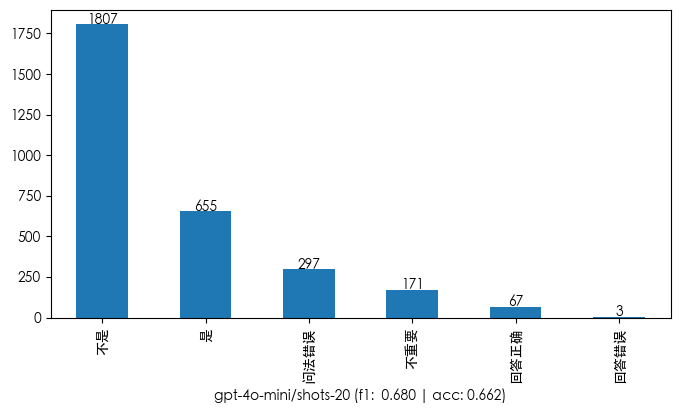

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


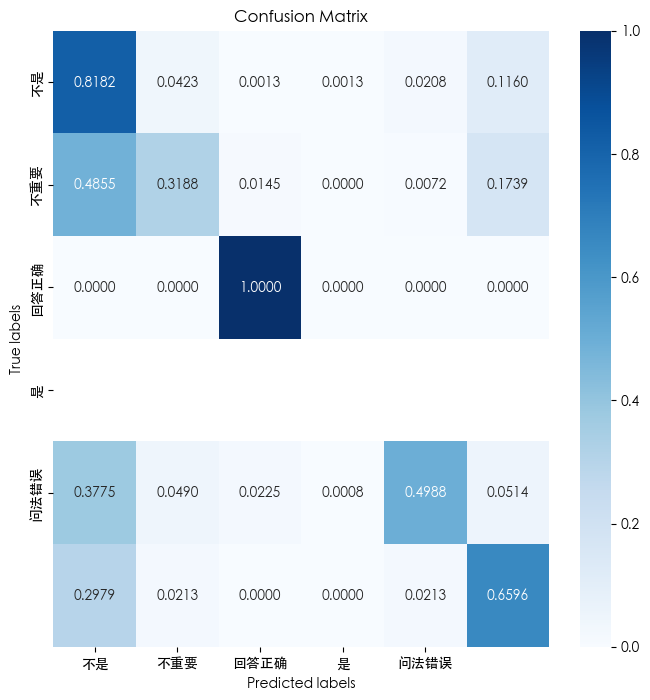

********** gpt-4o-mini/shots-30 **********
gpt-4o-mini/shots-30
不是       1945
是         665
问法错误      225
不重要       100
回答正确       62
回答错误        2
回答: 是       1
Name: count, dtype: int64


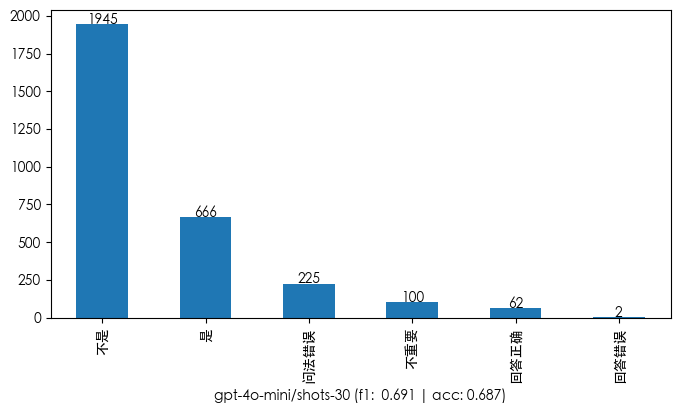

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


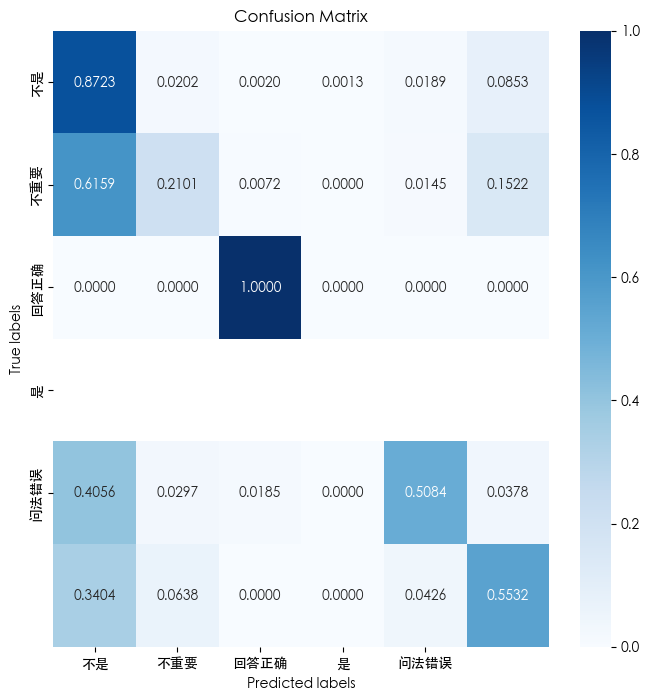

********** gpt-4o-mini/shots-40 **********
gpt-4o-mini/shots-40
不是          1971
是            681
问法错误         200
不重要           80
回答正确          64
回答错误           2
回答: 是          1
回答: 问法错误       1
Name: count, dtype: int64


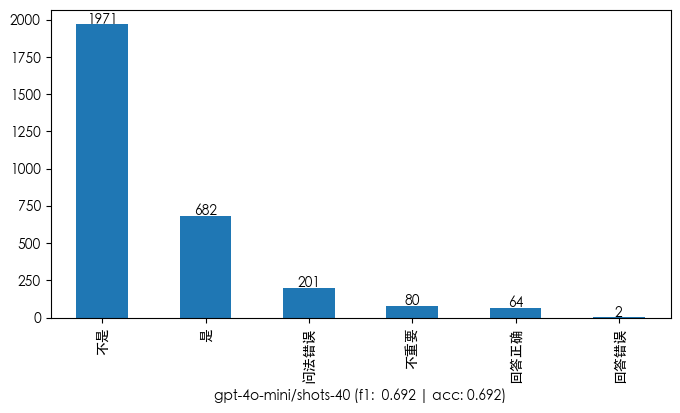

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


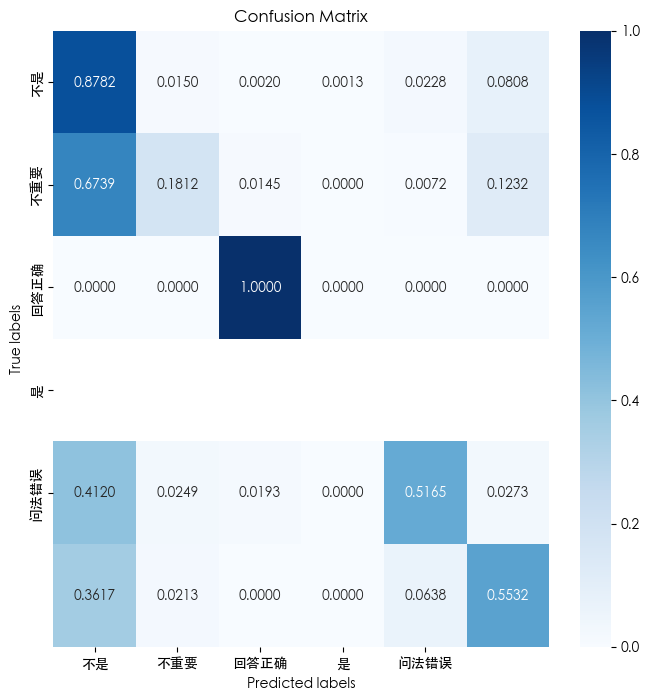

********** gpt-4o-mini/shots-50 **********
gpt-4o-mini/shots-50
不是          2015
是            715
问法错误         137
不重要           74
回答正确          57
回答: 问法错误       1
回答错误           1
Name: count, dtype: int64


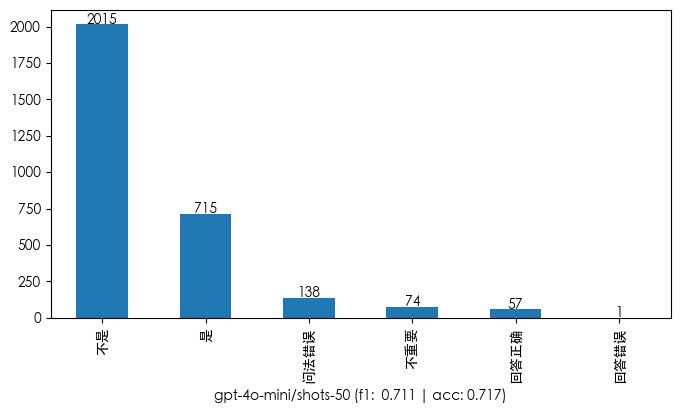

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


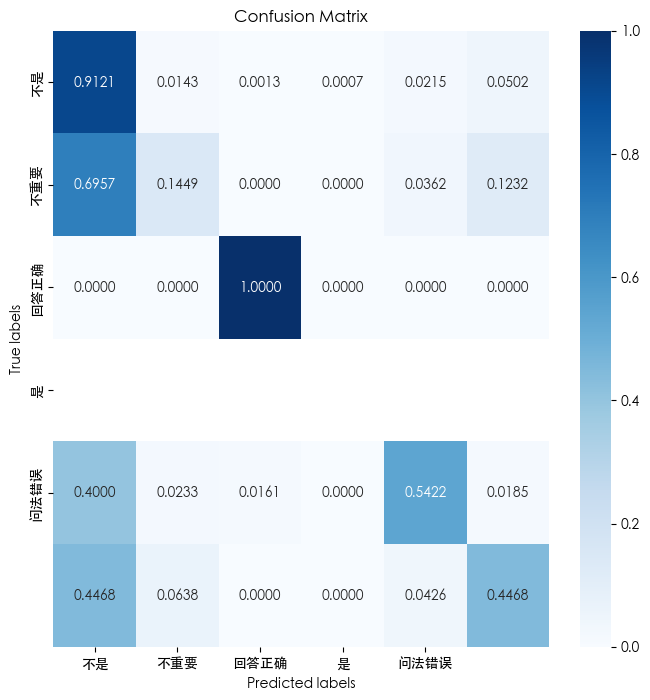

********** gpt-4o/shots-00 **********
gpt-4o/shots-00
不是。           1564
是。            1015
不重要。           142
不重要             82
问法错误            82
回答正确。           41
问法错误。           38
回答正确            14
不是              13
是                7
物品。              1
小男孩的。回答正确。       1
Name: count, dtype: int64


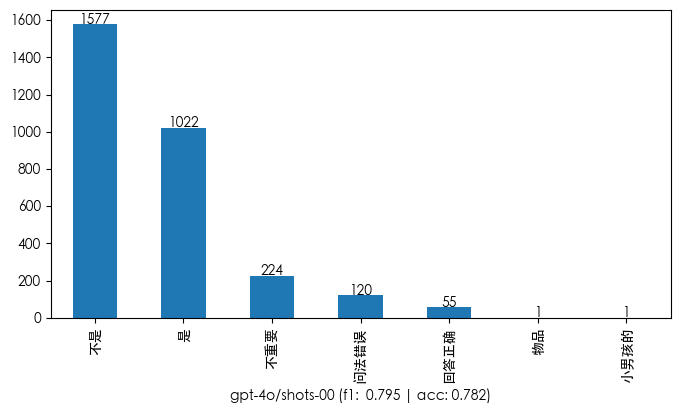

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


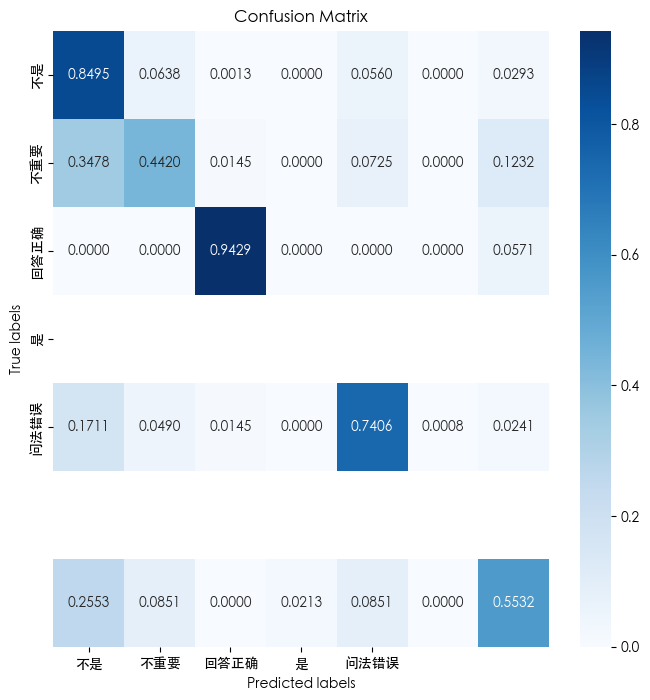

********** gpt-4o/shots-05 **********
gpt-4o/shots-05
不是      1565
是       1034
不重要      256
问法错误      85
回答正确      54
是。         6
Name: count, dtype: int64


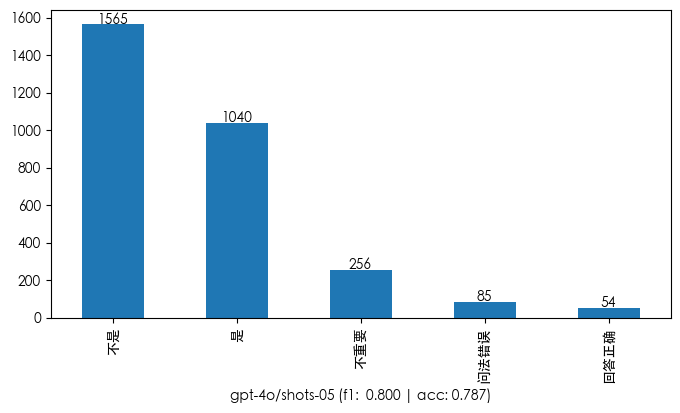

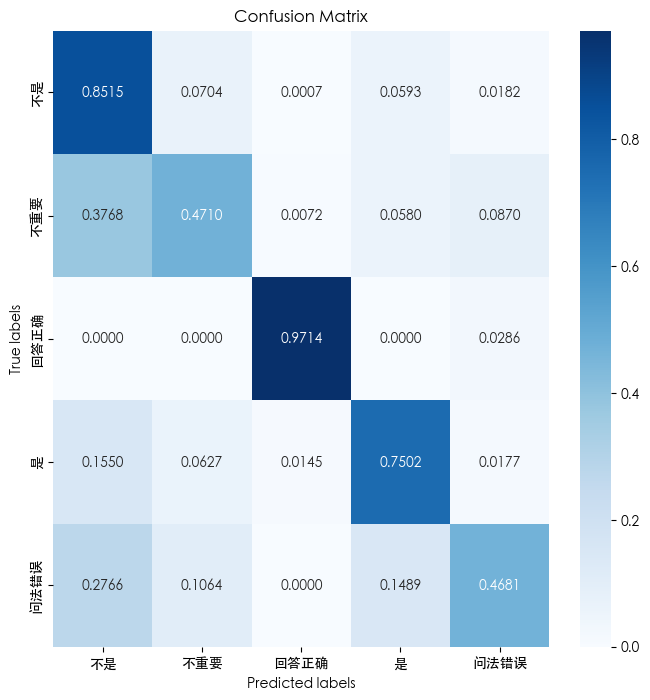

********** gpt-4o/shots-10 **********
gpt-4o/shots-10
不是      1543
是       1082
不重要      240
问法错误      89
回答正确      45
重要         1
Name: count, dtype: int64


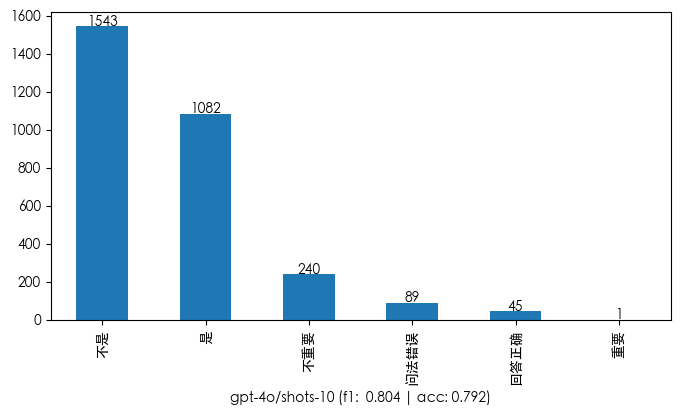

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


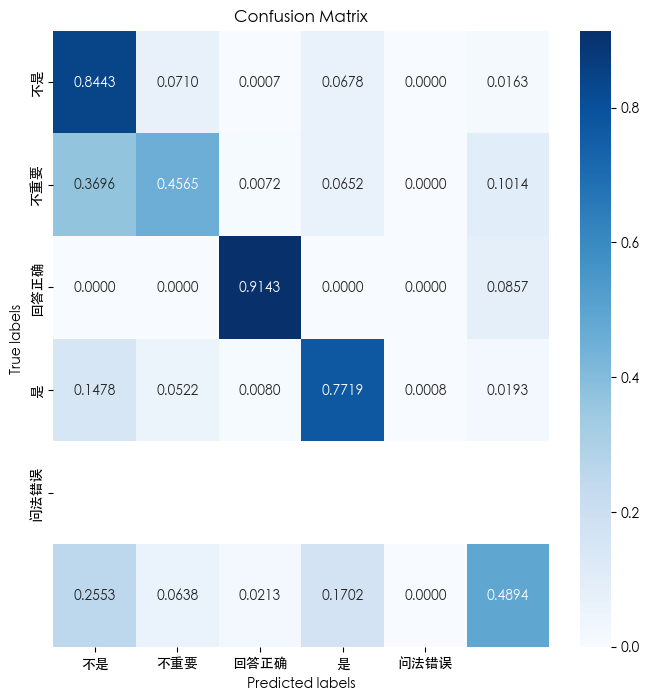

********** gpt-4o/shots-20 **********
gpt-4o/shots-20
不是                                                                                                                                                                                                                                                                                                                                           1507
是                                                                                                                                                                                                                                                                                                                                            1081
不重要                                                                                                                                                                                                                                                                           

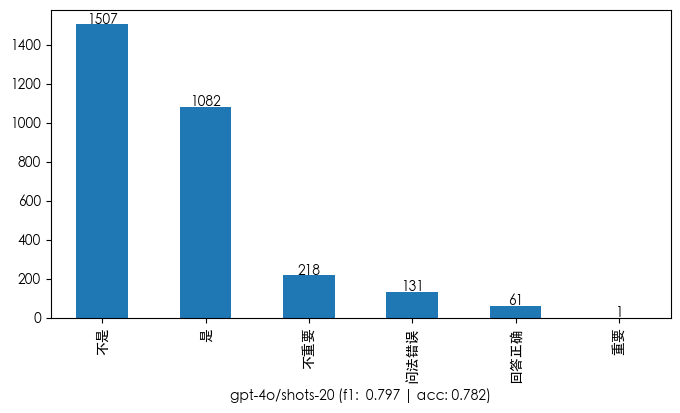

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


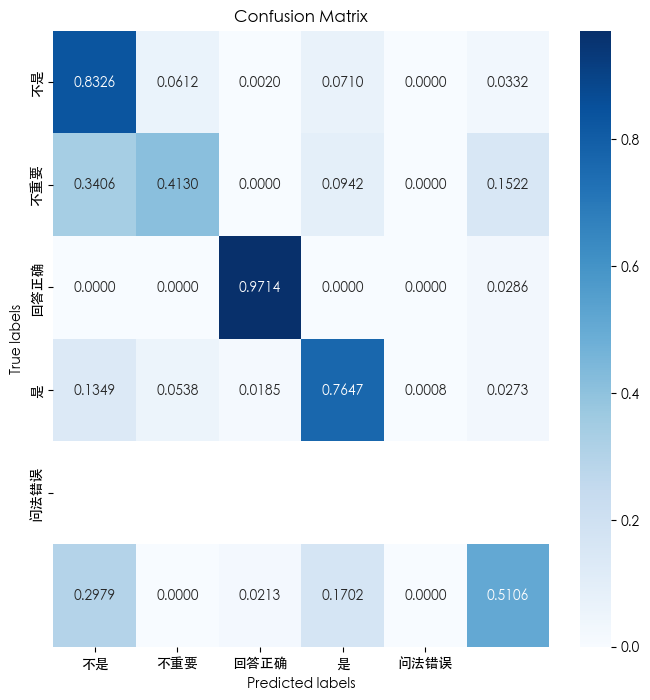

********** gpt-4o/shots-30 **********
gpt-4o/shots-30
不是        1526
是         1073
不重要        204
问法错误       142
回答正确        52
不是\n\n       2
重要           1
Name: count, dtype: int64


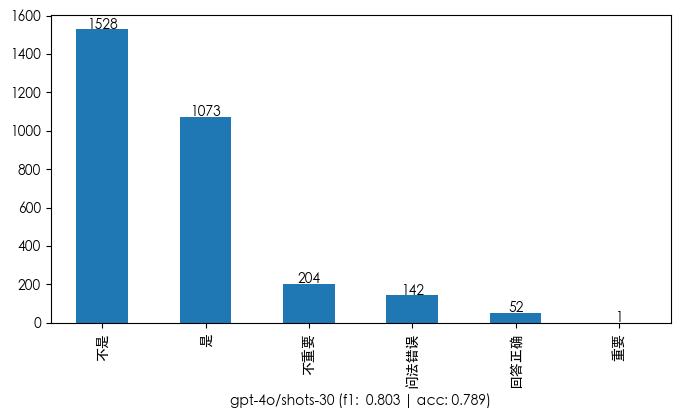

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


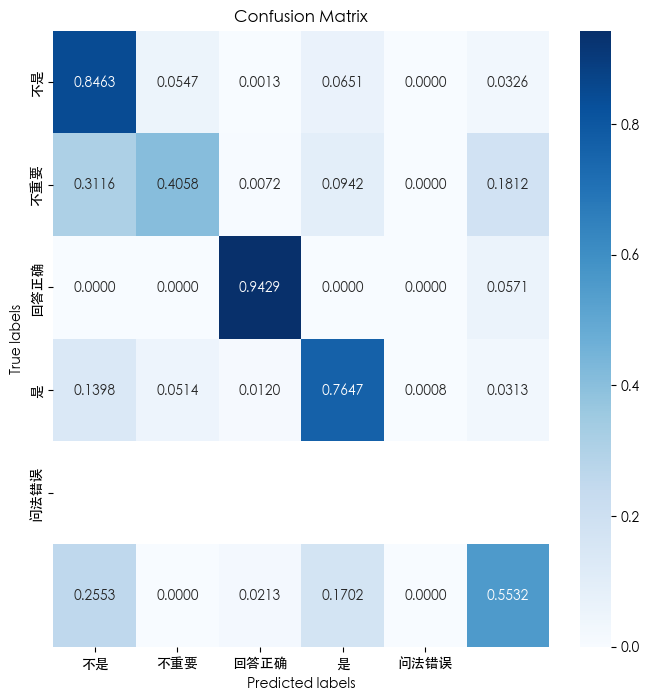

********** gpt-4o/shots-40 **********
gpt-4o/shots-40
不是                                                                                                                                                                                                                                                                                                                                                         1513
是                                                                                                                                                                                                                                                                                                                                                          1072
不重要                                                                                                                                                                                                                                               

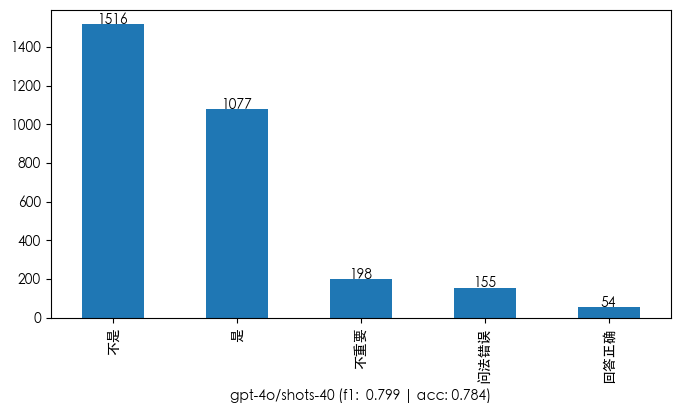

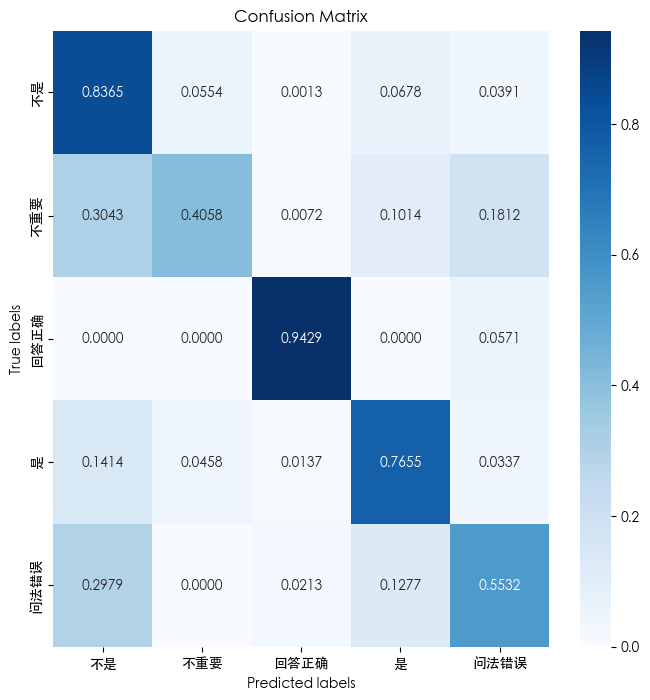

********** gpt-4o/shots-50 **********
gpt-4o/shots-50
不是       1523
是        1081
不重要       217
问法错误      126
回答正确       51
是\n\n       1
重要          1
Name: count, dtype: int64


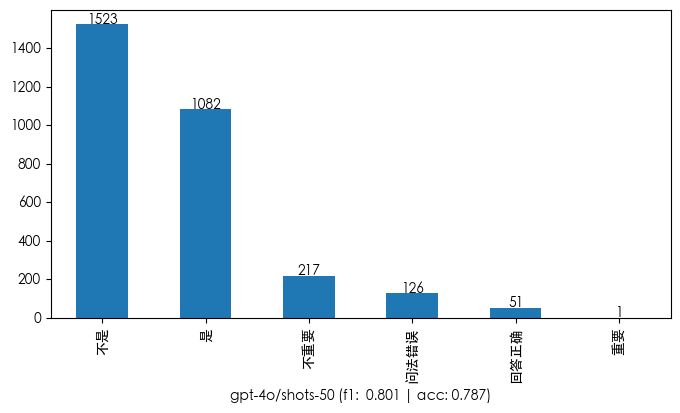

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


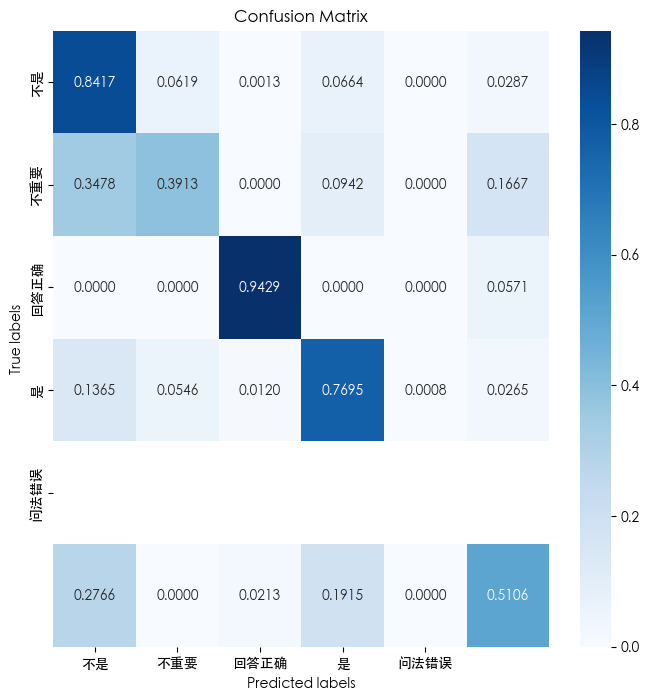

********** o1-mini/shots-00 **********
o1-mini/shots-00
不是       1476
是         970
不重要       238
问法错误      208
回答正确      105
是。          1
回答: 是       1
不是。         1
Name: count, dtype: int64


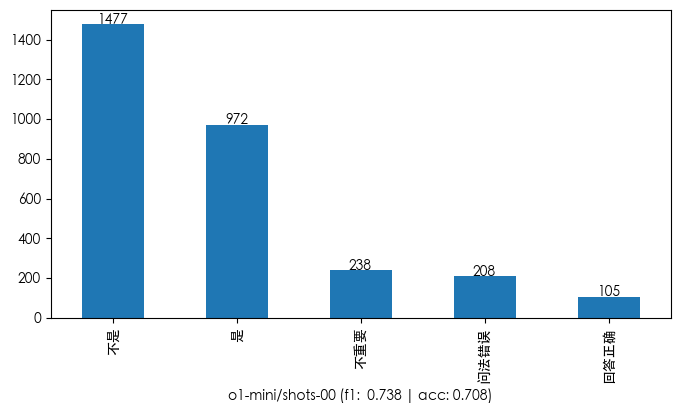

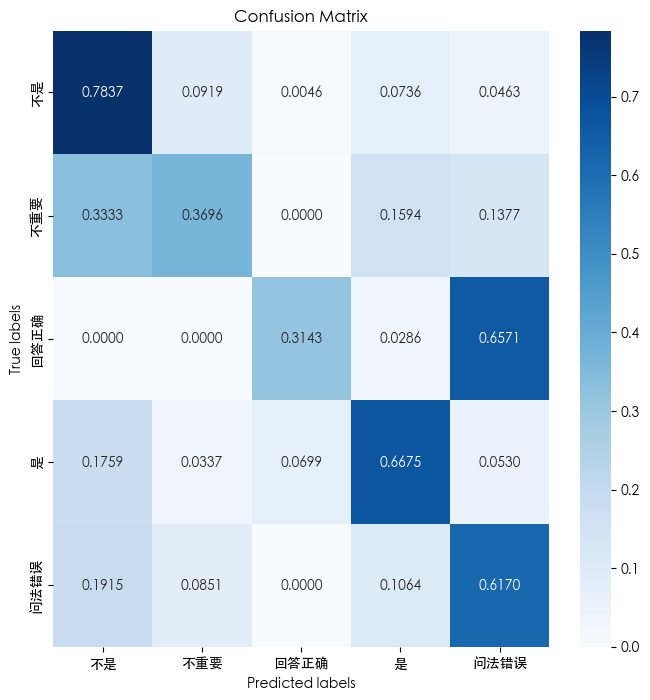

********** o1-mini/shots-10 **********
o1-mini/shots-10
不是          1478
是            993
不重要          263
问法错误         137
回答正确         112
回答: 是          7
回答: 问法错误       6
回答: 不是         2
回答: 回答正确       1
回答: 不重要        1
Name: count, dtype: int64


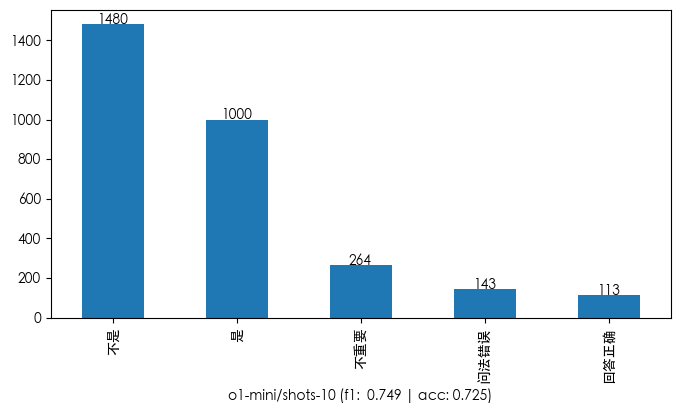

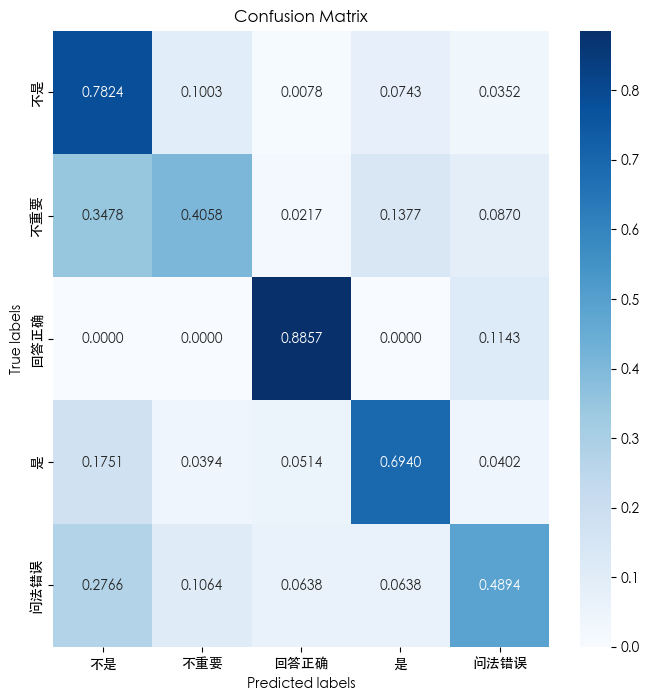

********** o1-preview/shots-00 **********
o1-preview/shots-00
不是       1519
是         999
问法错误      322
不重要        97
回答正确       57
回答: 是       6
Name: count, dtype: int64


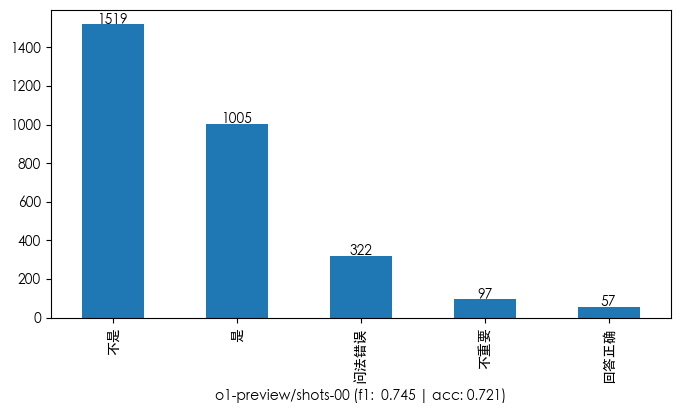

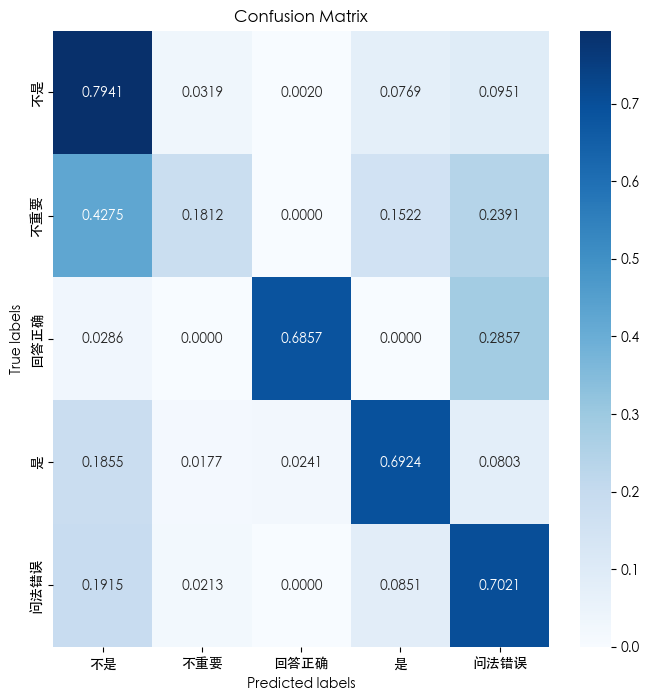

********** o1-preview/shots-10 **********
o1-preview/shots-10
不是          1478
是           1061
问法错误         232
不重要          122
回答正确          69
回答: 是         25
回答: 不是         8
回答: 问法错误       5
Name: count, dtype: int64


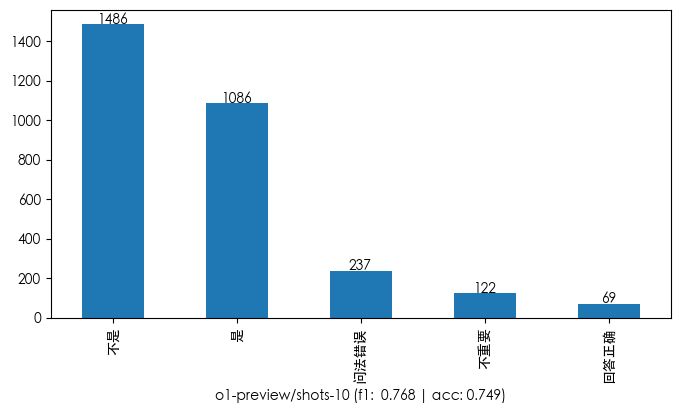

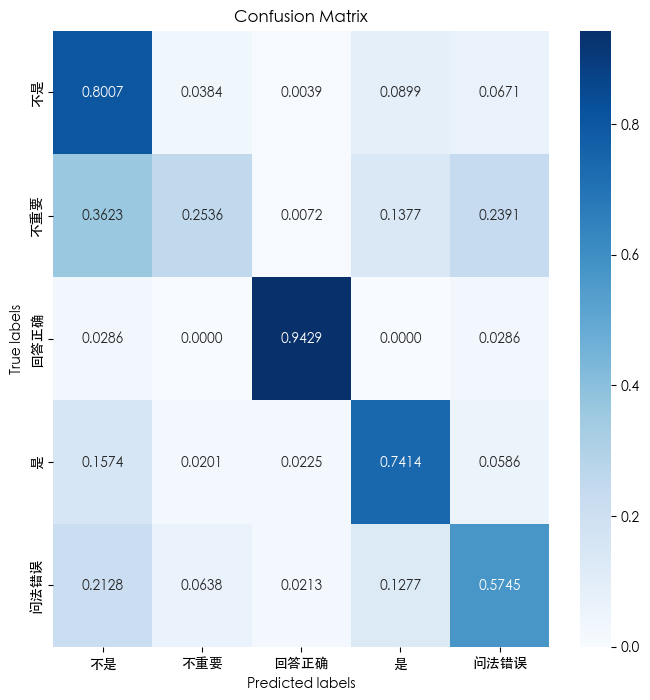

********** gpt-4o-mini_batch/shots-10 **********
gpt-4o-mini_batch/shots-10
不是          1823
是            632
问法错误         301
不重要          176
回答正确          56
回答错误           4
回答: 不是         2
回答: 是          2
回答: 问法错误       2
是不重要           1
回答: 不重要        1
Name: count, dtype: int64


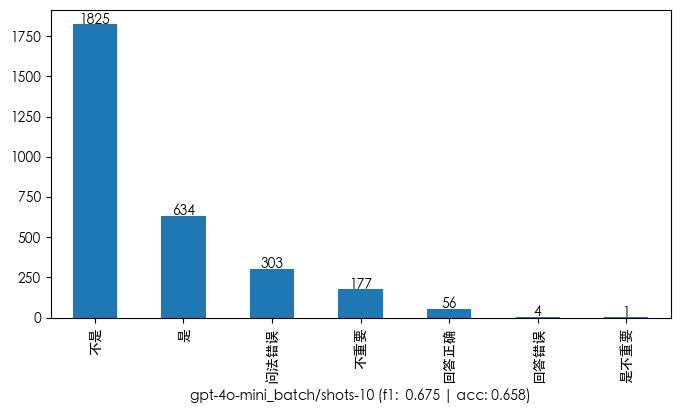

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:600: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


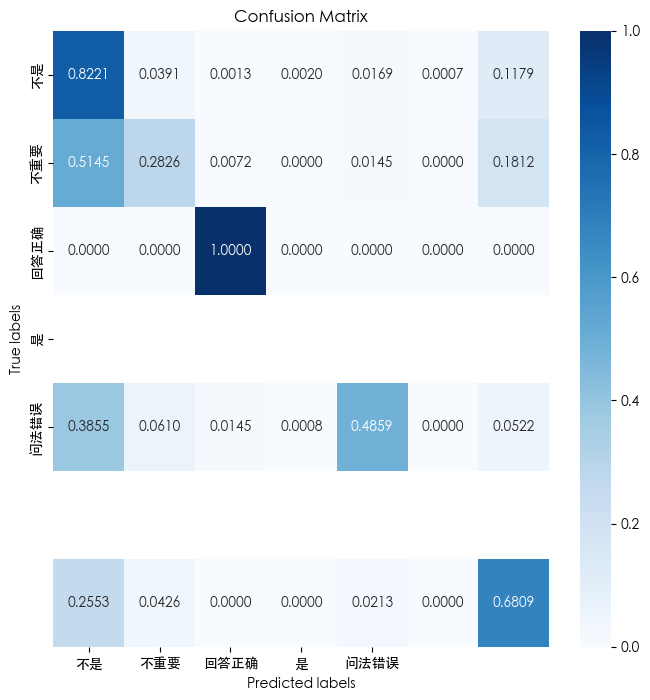

In [26]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})", preprocess_func=extract_answer)